In [1]:
import scanpy as sc 
import pandas as pd 
import matplotlib.pyplot as pl 
import scvelo as scv 

In [4]:
pip install libpython


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for libpython: filename=libpython-0.2-py3-none-any.whl size=14400 sha256=6a4cb2aa119c400efbf819bfad7e85c5d365f186be9ee163c7bd2e641770b915
  Stored in directory: c:\users\skeam\appdata\local\pip\cache\wheels\6e\ac\00\f608905c38e7dd61075c894c315dbd2195fcfefb7d7cc715b0
Successfully built libpython


In [2]:
pip install annoy

  Using cached annoy-1.17.3.tar.gz (647 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-win_amd64.whl size=52574 sha256=af881aff1f86eb03889a1b06868c29df3591146d970d396e3fd9a182b9c33fe5
  Stored in directory: c:\users\skeam\appdata\local\pip\cache\wheels\33\e5\58\0a3e34b92bedf09b4c57e37a63ff395ade6f6c1099ba59877c
Successfully built annoy
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install bbknn

Note: you may need to restart the kernel to use updated packages.Collecting bbknn
  Obtaining dependency information for bbknn from https://files.pythonhosted.org/packages/ac/17/bc4ee1fe8d0e382f480581b2295d81e57c8a304d4c10f2088903ffb37f32/bbknn-1.6.0-py3-none-any.whl.metadata
  Using cached bbknn-1.6.0-py3-none-any.whl.metadata (8.2 kB)
  Obtaining dependency information for Cython from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
  Using cached Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached bbknn-1.6.0-py3-none-any.whl (14 kB)
Using cached Cython-3.0.10-cp311-cp311-win_amd64.whl (2.8 MB)



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [2]:
import bbknn

In [2]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

scanpy==1.9.6 anndata==0.10.4 umap==0.5.5 numpy==1.24.3 scipy==1.11.1 pandas==2.0.3 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.8 louvain==0.8.2 pynndescent==0.5.11


In [ ]:
# I have single cell samples in gz file so I need to decompress first! 
import gzip
import shutil


In [ ]:
# Define the paths to your compressed files
compressed_files = {
    'barcodes': 'path/to/barcodes.tsv.gz',
    'features': 'path/to/features.tsv.gz',
    'matrix': 'path/to/matrix.mtx.gz'
}

# Define the paths for the decompressed files
decompressed_files = {
    'barcodes': 'path/to/barcodes.tsv',
    'features': 'path/to/features.tsv',
    'matrix': 'path/to/matrix.mtx'
}

# Decompress each file
for key in compressed_files:
    with gzip.open(compressed_files[key], 'rb') as f_in:
        with open(decompressed_files[key], 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [3]:
adata1= sc.read_10x_mtx("filtered_gene_bc_matrices/GSE132771/NMLAll1/", 
                       var_names= "gene_symbols", cache= True)

... reading from cache file cache\filtered_gene_bc_matrices-GSE132771-NMLAll1-matrix.h5ad


In [4]:
adata1.var_names_make_unique()

In [5]:
adata2= sc.read_10x_mtx("filtered_gene_bc_matrices/GSE132771/NMLAll2/", 
                       var_names= "gene_symbols", cache= True)

... writing an h5ad cache file to speedup reading next time


In [7]:
adata2.var_names_make_unique()

In [9]:
adata3= sc.read_10x_mtx("filtered_gene_bc_matrices/GSE132771/NMLAll3/", 
                       var_names= "gene_symbols", cache= True)

... writing an h5ad cache file to speedup reading next time


In [10]:
adata3.var_names_make_unique()

In [24]:
adata= adata1.concatenate([adata2, adata3], batch_categories= ['NML1', 'NML2', 'NML3'])

In [25]:
adata

AnnData object with n_obs × n_vars = 12091 × 33694
    obs: 'batch'
    var: 'gene_ids'

In [26]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells= 3)

filtered out 26 cells that have less than 200 genes expressed
filtered out 13526 genes that are detected in less than 3 cells


In [14]:
adata.obs_names

Index(['AAACCTGAGTGTTGAA-1-NML1', 'AAACCTGCAGCCACCA-1-NML1',
       'AAACCTGCATACGCCG-1-NML1', 'AAACCTGCATTTCACT-1-NML1',
       'AAACCTGGTGTAACGG-1-NML1', 'AAACGGGAGCTAGTGG-1-NML1',
       'AAACGGGAGGTGCTTT-1-NML1', 'AAACGGGAGTCCATAC-1-NML1',
       'AAACGGGCACCAGTTA-1-NML1', 'AAACGGGGTAATCACC-1-NML1',
       ...
       'TTTGTCACACCGAATT-1-NML3', 'TTTGTCACATGTAGTC-1-NML3',
       'TTTGTCACATTACCTT-1-NML3', 'TTTGTCAGTACGCTGC-1-NML3',
       'TTTGTCAGTAGAGTGC-1-NML3', 'TTTGTCAGTGATGTGG-1-NML3',
       'TTTGTCAGTGCCTGTG-1-NML3', 'TTTGTCAGTGTTTGGT-1-NML3',
       'TTTGTCAGTTAGGGTG-1-NML3', 'TTTGTCATCCCATTTA-1-NML3'],
      dtype='object', length=12065)

In [15]:
adata.obs_names

Index(['AAACCTGAGTGTTGAA-1-NML1', 'AAACCTGCAGCCACCA-1-NML1',
       'AAACCTGCATACGCCG-1-NML1', 'AAACCTGCATTTCACT-1-NML1',
       'AAACCTGGTGTAACGG-1-NML1', 'AAACGGGAGCTAGTGG-1-NML1',
       'AAACGGGAGGTGCTTT-1-NML1', 'AAACGGGAGTCCATAC-1-NML1',
       'AAACGGGCACCAGTTA-1-NML1', 'AAACGGGGTAATCACC-1-NML1',
       ...
       'TTTGTCACACCGAATT-1-NML3', 'TTTGTCACATGTAGTC-1-NML3',
       'TTTGTCACATTACCTT-1-NML3', 'TTTGTCAGTACGCTGC-1-NML3',
       'TTTGTCAGTAGAGTGC-1-NML3', 'TTTGTCAGTGATGTGG-1-NML3',
       'TTTGTCAGTGCCTGTG-1-NML3', 'TTTGTCAGTGTTTGGT-1-NML3',
       'TTTGTCAGTTAGGGTG-1-NML3', 'TTTGTCATCCCATTTA-1-NML3'],
      dtype='object', length=12065)

In [16]:
adata.var_names

Index(['RP11-34P13.7', 'FO538757.2', 'AP006222.2', 'RP4-669L17.10',
       'RP5-857K21.4', 'RP11-206L10.9', 'FAM87B', 'LINC00115', 'FAM41C',
       'RP11-54O7.1',
       ...
       'BX004987.4', 'AC145212.4', 'AC145212.2', 'AC011043.1', 'AL592183.1',
       'AC007325.4', 'AC007325.2', 'AL354822.1', 'AC004556.1', 'AC240274.1'],
      dtype='object', length=20168)

In [27]:
adata.var['mt']= adata.var_names.str.startswith('MT-') # Annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars= ["mt"], percent_top= None, log1p= False, inplace= True)

In [18]:
adata.obs

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCTGAGTGTTGAA-1-NML1,NML1,940,939,2253.0,69.0,3.062583
AAACCTGCAGCCACCA-1-NML1,NML1,2186,2186,9481.0,189.0,1.993461
AAACCTGCATACGCCG-1-NML1,NML1,1321,1321,2838.0,23.0,0.810430
AAACCTGCATTTCACT-1-NML1,NML1,1935,1934,5111.0,190.0,3.717472
AAACCTGGTGTAACGG-1-NML1,NML1,1605,1605,7035.0,267.0,3.795309
...,...,...,...,...,...,...
TTTGTCAGTGATGTGG-1-NML3,NML3,1200,1200,2395.0,51.0,2.129436
TTTGTCAGTGCCTGTG-1-NML3,NML3,796,796,1510.0,26.0,1.721854
TTTGTCAGTGTTTGGT-1-NML3,NML3,1696,1696,6070.0,157.0,2.586491
TTTGTCAGTTAGGGTG-1-NML3,NML3,1435,1435,4143.0,80.0,1.930968


In [19]:
adata.obs.head()

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACCTGAGTGTTGAA-1-NML1,NML1,940,939,2253.0,69.0,3.062583
AAACCTGCAGCCACCA-1-NML1,NML1,2186,2186,9481.0,189.0,1.993461
AAACCTGCATACGCCG-1-NML1,NML1,1321,1321,2838.0,23.0,0.810430
AAACCTGCATTTCACT-1-NML1,NML1,1935,1934,5111.0,190.0,3.717472
AAACCTGGTGTAACGG-1-NML1,NML1,1605,1605,7035.0,267.0,3.795309


In [20]:
adata.obs.tail(10)

,batch,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
TTTGTCACACCGAATT-1-NML3,NML3,2879,2879,12122.0,290.0,2.392344
TTTGTCACATGTAGTC-1-NML3,NML3,789,789,1819.0,165.0,9.070918
TTTGTCACATTACCTT-1-NML3,NML3,644,644,1120.0,12.0,1.071429
TTTGTCAGTACGCTGC-1-NML3,NML3,1111,1111,2826.0,64.0,2.264685
TTTGTCAGTAGAGTGC-1-NML3,NML3,727,727,1543.0,70.0,4.536617
TTTGTCAGTGATGTGG-1-NML3,NML3,1200,1200,2395.0,51.0,2.129436
TTTGTCAGTGCCTGTG-1-NML3,NML3,796,796,1510.0,26.0,1.721854
TTTGTCAGTGTTTGGT-1-NML3,NML3,1696,1696,6070.0,157.0,2.586491
TTTGTCAGTTAGGGTG-1-NML3,NML3,1435,1435,4143.0,80.0,1.930968
TTTGTCATCCCATTTA-1-NML3,NML3,627,627,1314.0,35.0,2.663623


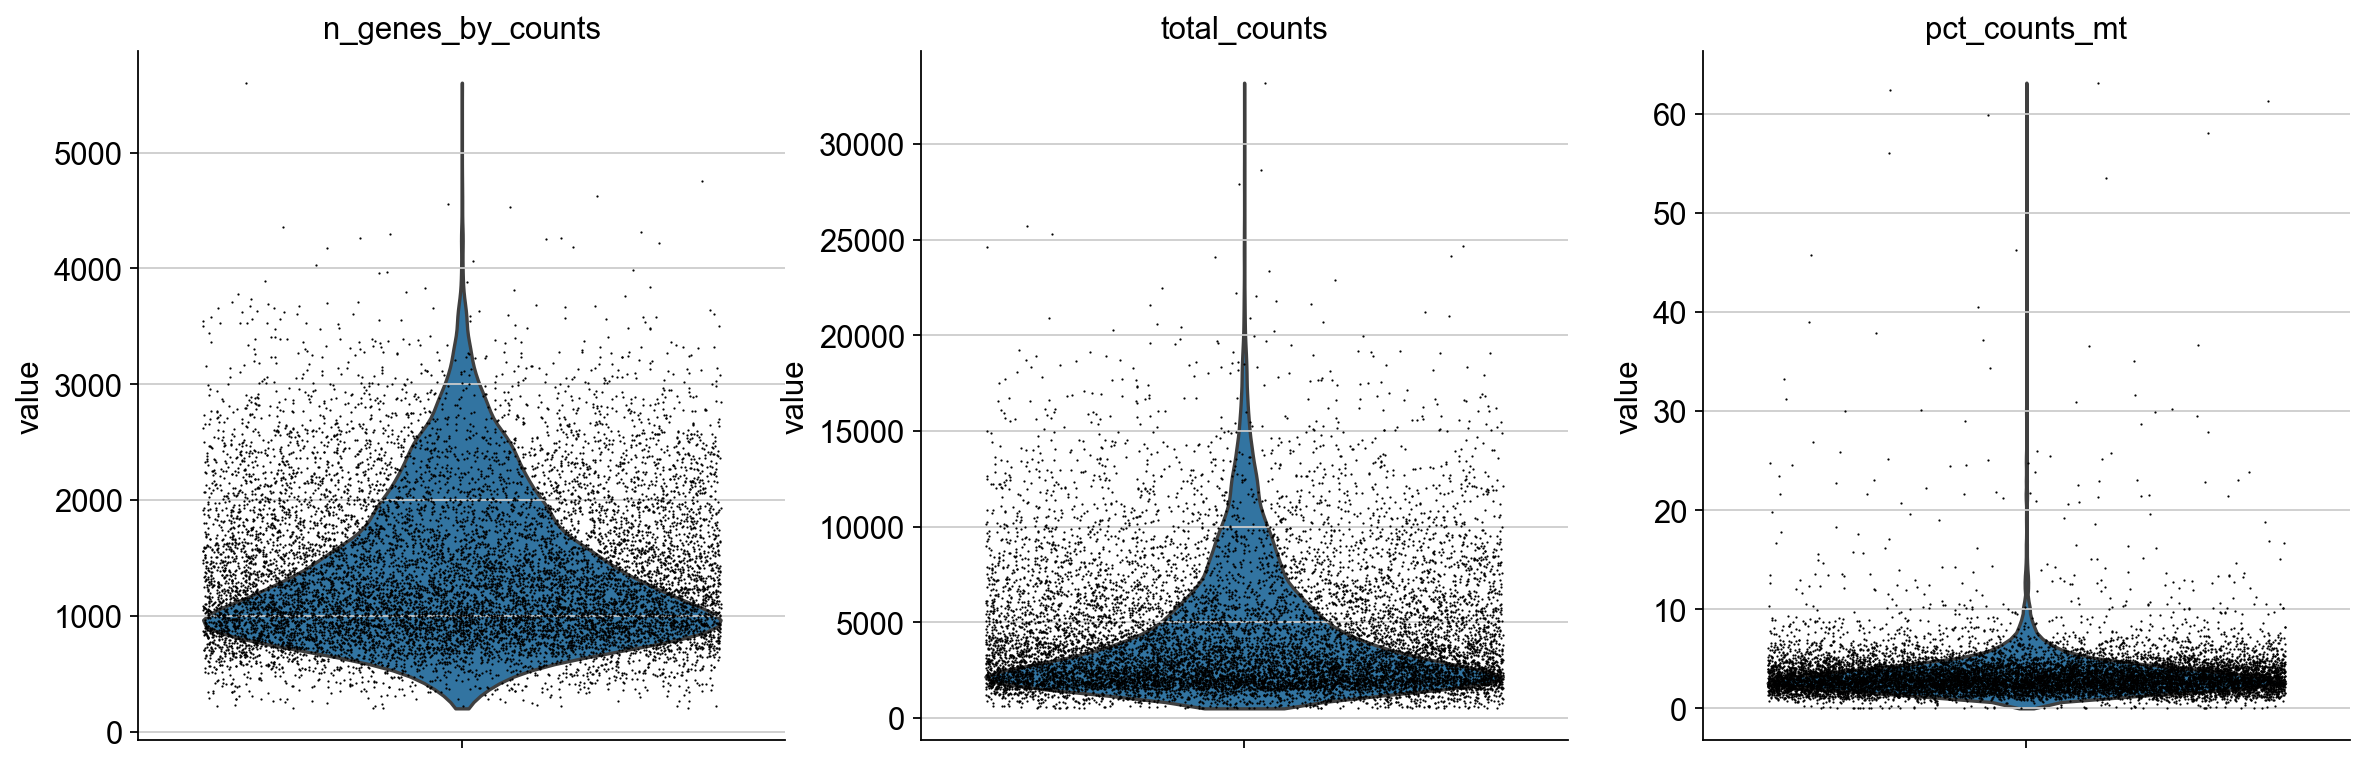

In [28]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel= True)

In [29]:
adata= adata[adata.obs.n_genes_by_counts <4000, :]
adata= adata[adata.obs.total_counts <20000, :]
adata= adata[adata.obs.pct_counts_mt <10, :]

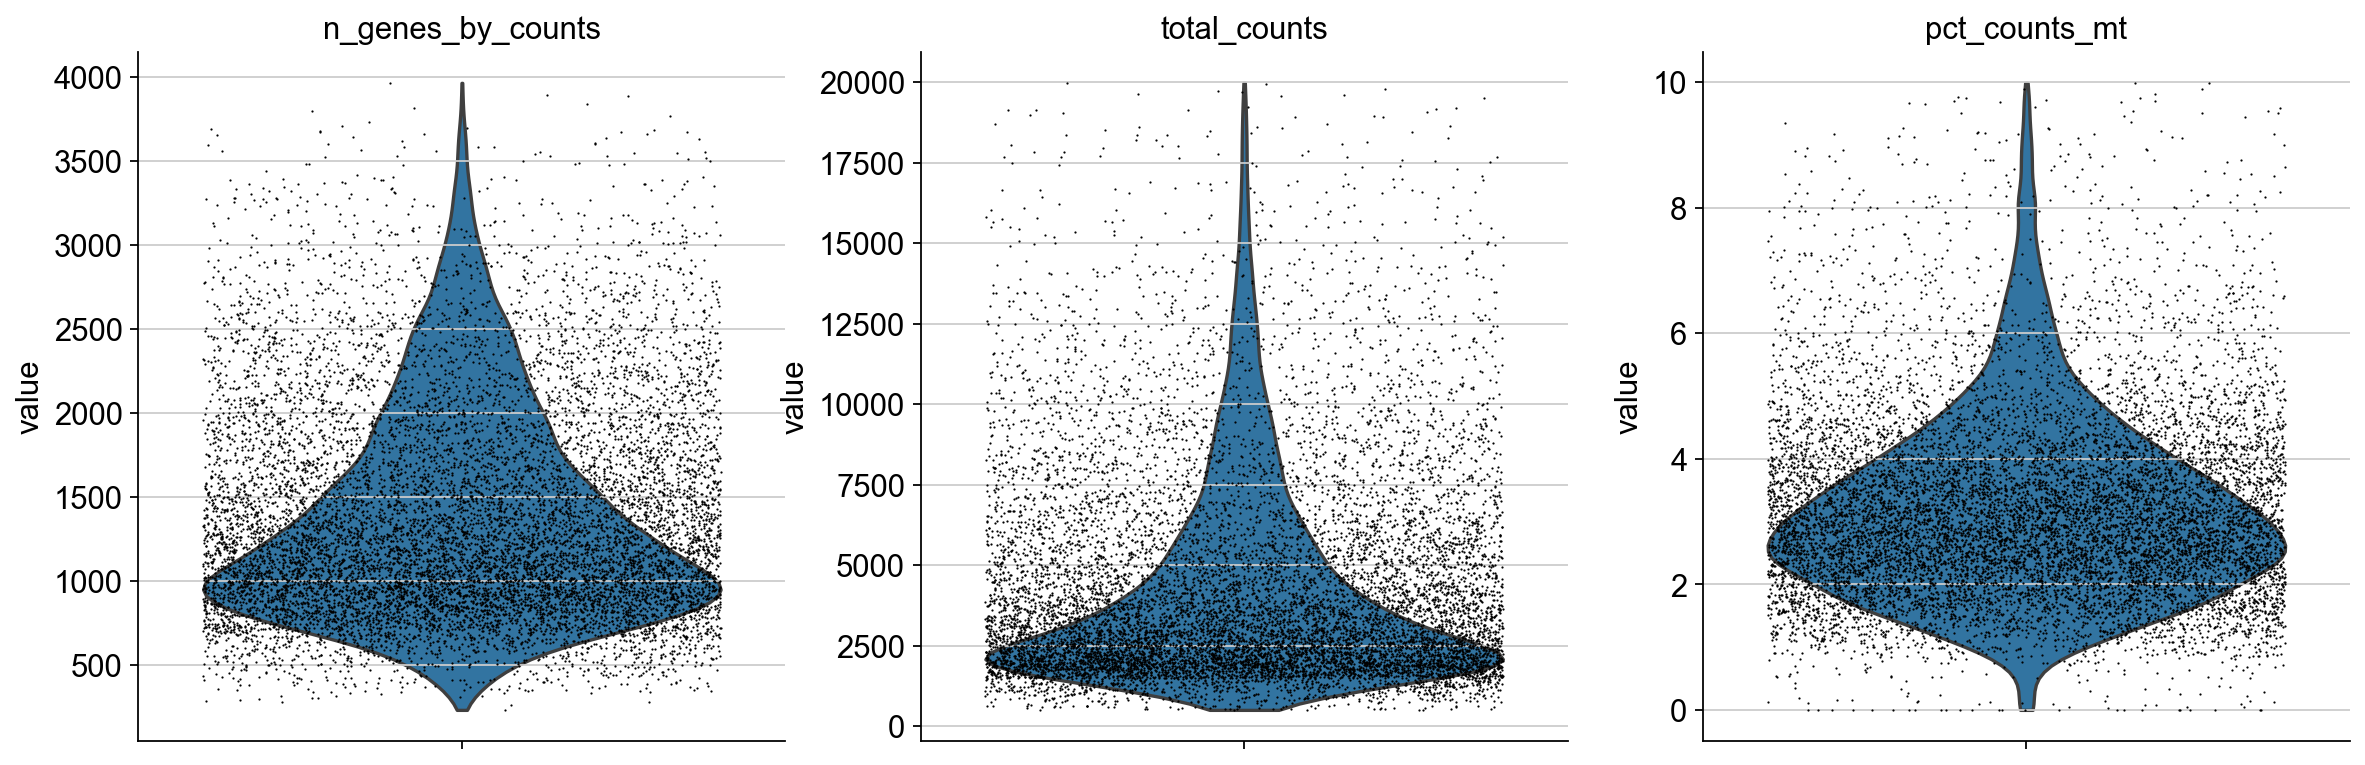

In [30]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel= True)

In [31]:
adata

View of AnnData object with n_obs × n_vars = 11827 × 20168
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [32]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [33]:
sc.pp.log1p(adata)

In [34]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean= 3, min_disp= 0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [35]:
sc.pp.scale(adata, max_value=10)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [37]:
sc.tl.pca(adata, svd_solver= 'arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:03)


In [42]:
adata.write("filtered_gene_bc_matrices/GSE132771/NML.h5ad")

In [43]:
sc.pp.neighbors(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:22)


In [44]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [45]:
sc.tl.leiden(adata, resolution= 0.05)

running Leiden clustering
    finished: found 7 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


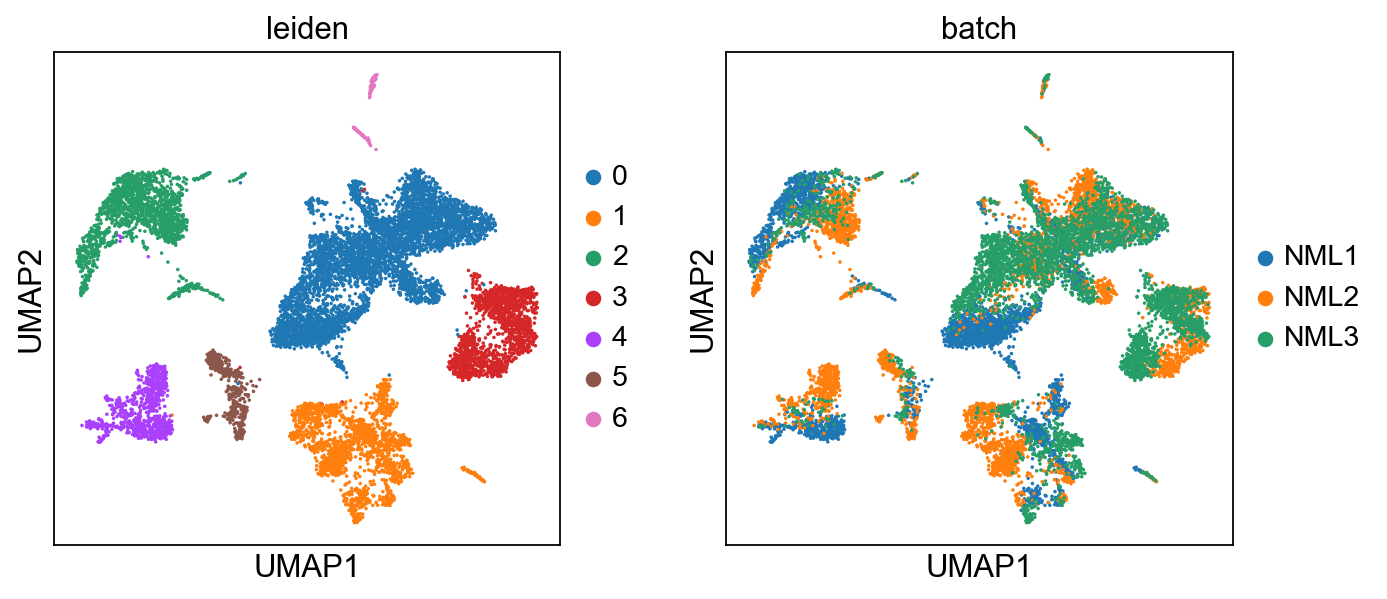

In [46]:
sc.pl.umap(adata, color=["leiden", "batch"])

In [47]:
adata

AnnData object with n_obs × n_vars = 11827 × 20168
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'batch_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [48]:
adata= sc.read_h5ad("filtered_gene_bc_matrices/GSE132771/NML.h5ad")

In [49]:
adata

AnnData object with n_obs × n_vars = 11827 × 20168
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [50]:
# BBKNN
sc.external.pp.bbknn(adata, batch_key="batch")

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [51]:
adata

AnnData object with n_obs × n_vars = 11827 × 20168
    obs: 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [52]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:08)


In [53]:
sc.tl.leiden(adata, resolution= 0.05)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [54]:
sc.tl.leiden(adata, resolution= 0.05)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


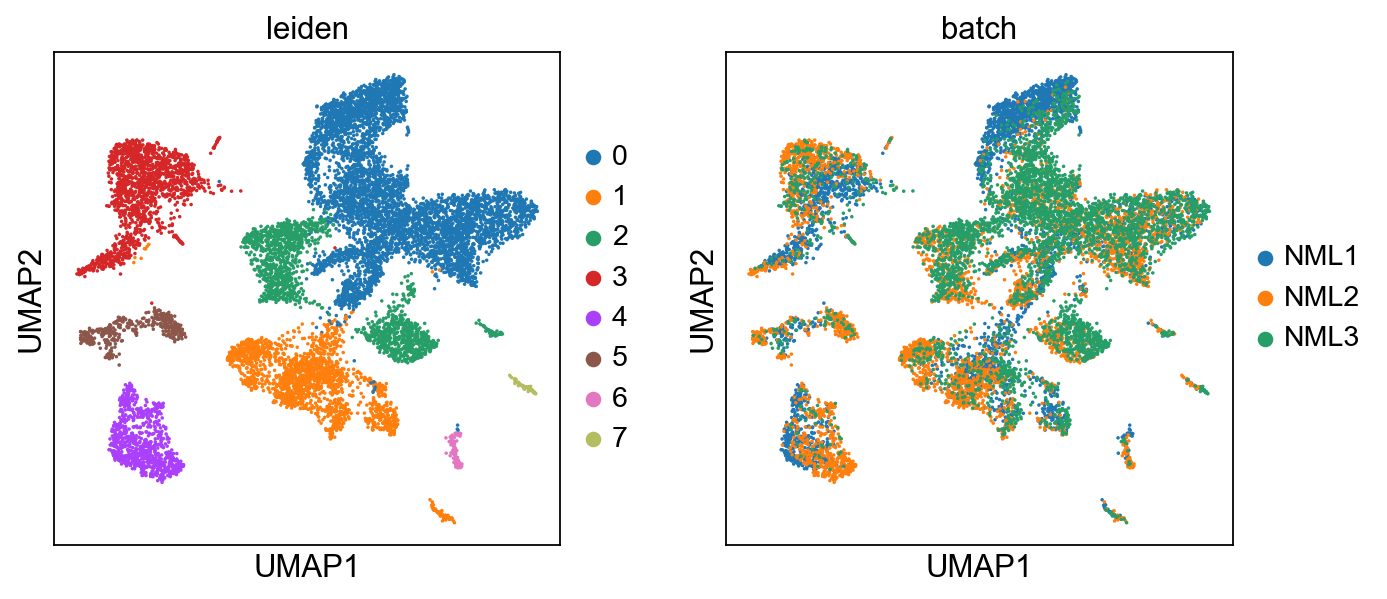

In [55]:
sc.pl.umap(adata, color=["leiden", "batch"])

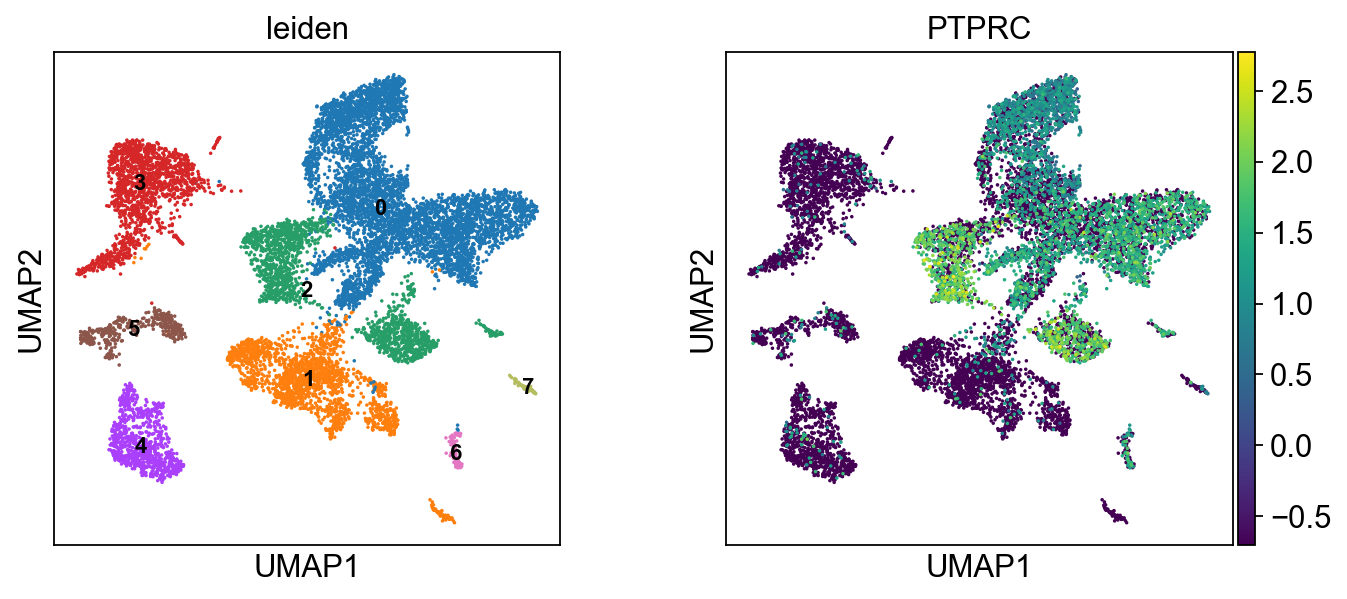

In [56]:
sc.pl.umap(adata, color=['leiden', 'PTPRC'], legend_loc= 'on data', legend_fontsize= 10)

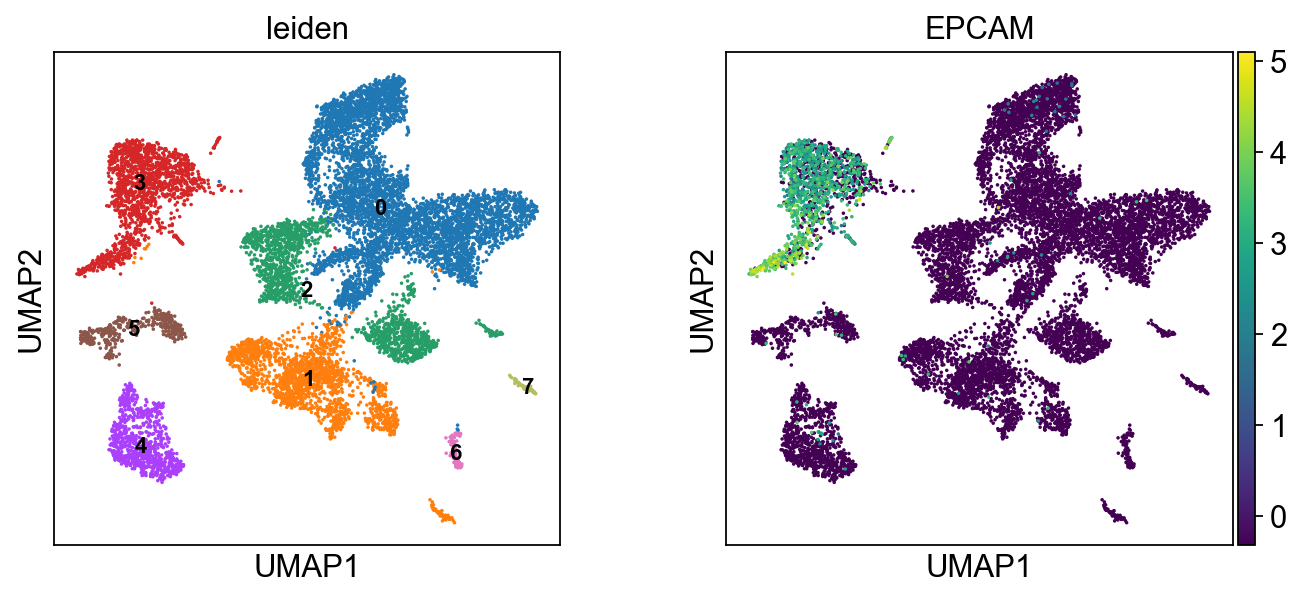

In [57]:
sc.pl.umap(adata, color=['leiden', 'EPCAM'], legend_loc= 'on data', legend_fontsize= 10)

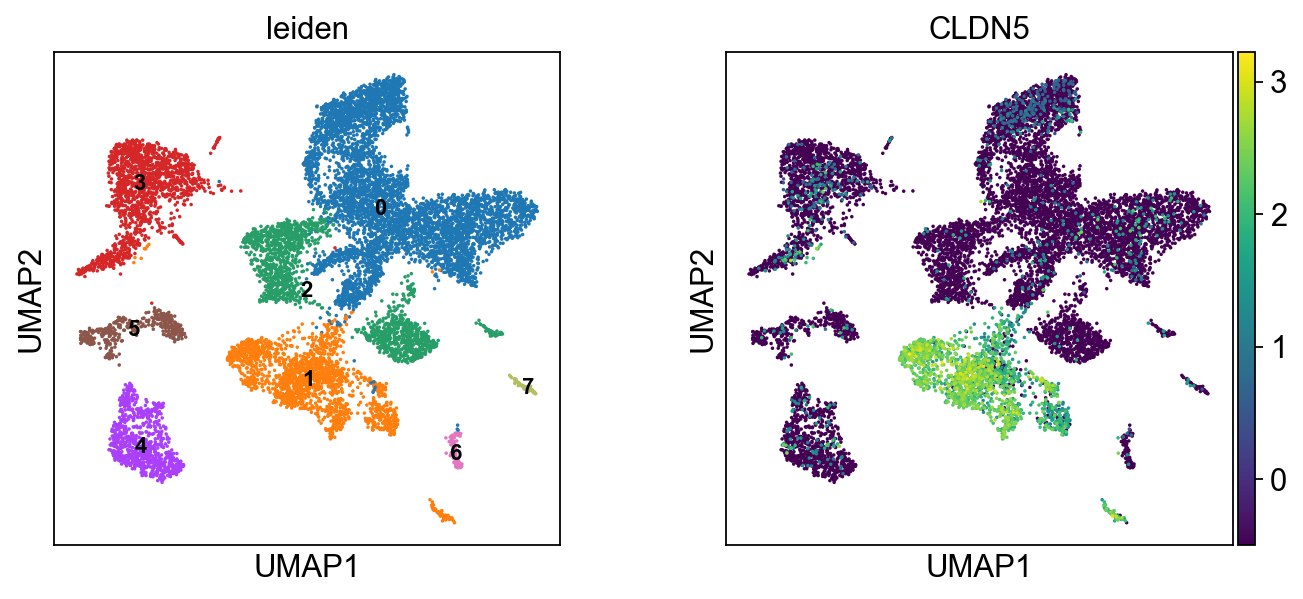

In [58]:
sc.pl.umap(adata, color=['leiden', 'CLDN5'], legend_loc= 'on data', legend_fontsize= 10)

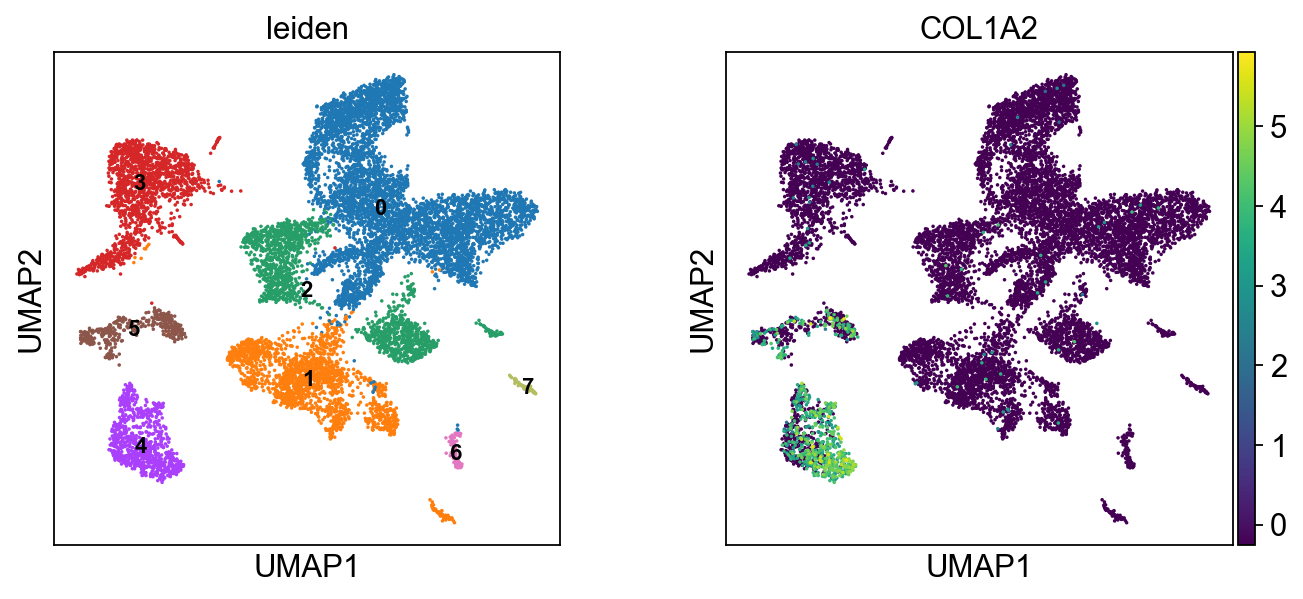

In [59]:
sc.pl.umap(adata, color=['leiden', 'COL1A2'], legend_loc= 'on data', legend_fontsize= 10)

In [60]:
new_cluster_names= ['IM0', 'EC1', 'PEI2', 'IM3', 'MESEN4', 'IM5', 'IM6', 'EPI7']
adata.rename_categories('leiden', new_cluster_names)

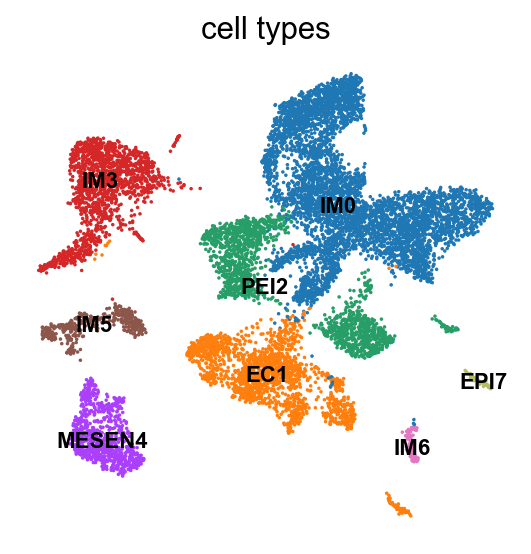

In [61]:
sc.pl.umap(adata, color='leiden', legend_loc= 'on data', legend_fontsize=10, title= 'cell types', frameon= False)

In [62]:
adata.write("filtered_gene_bc_matrices/GSE132771/NML_integrated.h5ad")